In [1]:
import numpy as np
import pandas as pd
#nltk.download("book")
from nltk.book import *
import nltk

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

## Importing data

In [3]:
t_data = pd.read_csv("train.csv") 

In [4]:
t_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
t_data_test = pd.read_csv("test.csv")

In [6]:
t_data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Basic analysis

### Distribution of target class

In [7]:
round(sum(t_data["target"] == 1)/t_data.shape[0]*100,2)

42.97

### Keywords

In [8]:
#Checking how much of the data does not have a keyword
round((sum(t_data["keyword"].isna()) / t_data.shape[0]) * 100, 2)

0.8

In [9]:
round((sum(t_data_test["keyword"].isna()) / t_data_test.shape[0]) * 100,2)

0.8

Keywords are very less relatively

### Tweet size distribution

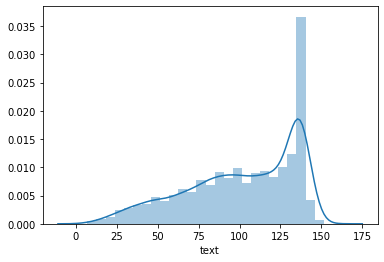

In [10]:
#Characters
sns.distplot(t_data["text"].apply(len))

In [11]:
t_data_words = t_data["text"].apply(str.split," ")

In [12]:
t_data_tokens = t_data["text"].apply(nltk.word_tokenize)
t_test_tokens = t_data_test["text"].apply(nltk.word_tokenize)

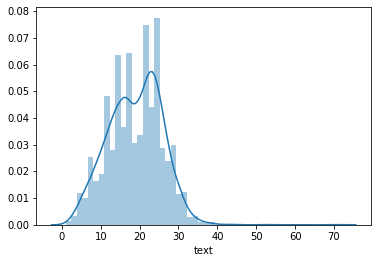

In [13]:
#Tokens distribution
sns.distplot(t_data_tokens.apply(len))

We have to remove the stopwords and non alphanumericals

In [14]:
from nltk.corpus import stopwords

In [15]:
t_tokens_c0 = t_data_tokens[t_data["target"]==0].apply(lambda ts:[t for t in ts if (t not in stopwords.words("english") and t.isalpha())] )

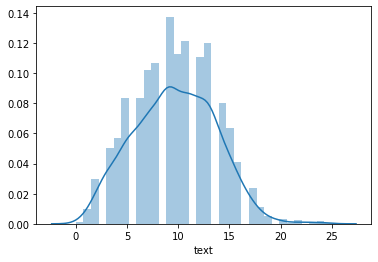

In [16]:
sns.distplot(t_tokens_c0.apply(len))

In [17]:
t_tokens_c1 = t_data_tokens[t_data["target"]==1].apply(lambda ts:[t for t in ts if (t not in stopwords.words("english") and t.isalpha())] )

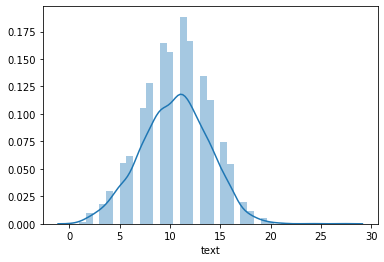

In [18]:
sns.distplot(t_tokens_c1.apply(len))

The distribution is approximately same

In [19]:
t_tokens_clean = t_data_tokens.apply(lambda ts:[t for t in ts if (t not in stopwords.words("english") and t.isalpha())] )
t_test_clean = t_test_tokens.apply(lambda ts:[t for t in ts if (t not in stopwords.words("english") and t.isalpha())] )

In [20]:
t_tokens_clean = t_tokens_clean.apply(lambda x:[w for w in x if len(w) >= 3])
t_test_clean = t_test_clean.apply(lambda x:[w for w in x if len(w) >= 3])

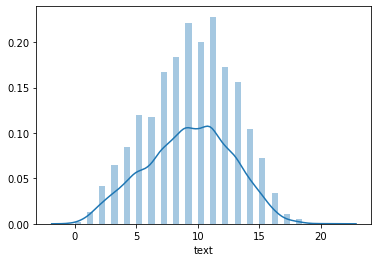

In [21]:
sns.distplot(t_tokens_clean.apply(len))

In [22]:
t_tokens_clean.apply(len).describe()

count    7613.000000
mean        9.280704
std         3.495796
min         0.000000
25%         7.000000
50%         9.000000
75%        12.000000
max        21.000000
Name: text, dtype: float64

### Extracting Hashtags

In [23]:
import re

In [24]:
pat = "#(\w+)"

In [25]:
hashtags = t_data["text"].str.findall(pat)
hashtags_test = t_data_test["text"].str.findall(pat)

In [26]:
hashtags  = hashtags.apply(" ".join)
hashtags_test = hashtags_test.apply(" ".join)

## Baseline model on hashtags, keywords and location

In [597]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [598]:
keywords = t_data["keyword"].replace(np.nan, "")
keywords_test = t_data_test["keyword"].replace(np.nan, "")

In [599]:
locations = t_data["location"].replace(np.nan, "")
locations_test = t_data_test["location"].replace(np.nan, "")

In [600]:
X = hashtags +" "+keywords+" "+locations

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, t_data["target"])

In [602]:
fit_v = CountVectorizer().fit(X_train)
X_train_v = fit_v.transform(X_train)
X_test_v = fit_v.transform(X_test)

In [603]:
lr = LogisticRegression(solver = "lbfgs")

In [604]:
lr.fit(X_train_v, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [605]:
lr.score(X_test_v, y_test)

0.726890756302521

In [606]:
args = lr.coef_[0].argsort()

In [607]:
features = np.array(fit_v.get_feature_names())

In [608]:
features[args[-20:]]

array(['collision', 'earthquake', 'thunderstorm', 'karachi',
       'devastation', 'evacuation', 'drought', '20spill', 'bombing',
       'hiroshima', 'wildfire', 'evacuated', 'razed', 'suicide',
       'typhoon', 'rescuers', 'debris', 'wreckage', 'derailment',
       'outbreak'], dtype='<U32')

## Building Model

### Lemmatize text 

In [609]:
from nltk import WordNetLemmatizer
from nltk import PorterStemmer

In [610]:
lemma = WordNetLemmatizer()

In [611]:
X = t_tokens_clean.apply(lambda t1: [lemma.lemmatize(w) for w in t1])
X = t_tokens_clean.apply(" ".join)
X  = X.apply("".join)

In [612]:
X = t_tokens_clean.apply(lambda t1: [lemma.lemmatize(w) for w in t1])
X = t_tokens_clean.apply(" ".join)
X  = X.apply("".join)

In [613]:
X_pred = t_test_clean.apply(lambda t1: [lemma.lemmatize(w) for w in t1])
X_pred = t_test_clean.apply(" ".join)
X_pred  = X_pred.apply("".join)

### Adding all the data together

In [614]:
X = hashtags+" "+keywords+" "+X
X_pred = hashtags_test+" "+keywords_test+" "+X_pred

In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, t_data["target"])

### Using CountVectorizer at word level

In [616]:
fit_v = CountVectorizer(strip_accents='unicode', ngram_range=(1, 3), analyzer='word', max_df=.5, min_df=1).fit(X_train)
X_train_w = fit_v.transform(X_train)
X_test_w = fit_v.transform(X_test)

In [617]:
lr = LogisticRegression(C= 10, solver = "lbfgs", max_iter = 10000)

In [618]:
lr.fit(X_train_w, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [619]:
lr.score(X_test_w, y_test)

0.7778361344537815

### Using CountVecotizer at character level

In [620]:
fit_v = CountVectorizer(strip_accents='unicode', ngram_range=(3, 6), analyzer='char', max_df=.3, min_df=1).fit(X_train)
X_train_c = fit_v.transform(X_train)
X_test_c = fit_v.transform(X_test)

In [621]:
lr2 = LogisticRegression(C= 10, solver = "liblinear", penalty = "l2", max_iter = 100)

In [622]:
lr2.fit(X_train_c, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [623]:
lr2.score(X_test_c, y_test)

0.7589285714285714

Logistic Regression with char counts gives better

### SVM

In [428]:
svm = SVC(C=10)

In [429]:
svm.fit(X_train_w, y_train)

C:\Users\Onkar\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [430]:
svm.score(X_test_w, y_test)

0.5777310924369747

In [431]:
svm.fit(X_train_c, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [432]:
svm.score(X_test_c, y_test)

0.6449579831932774

Runs too slow 

### NB

In [624]:
from sklearn.naive_bayes import MultinomialNB

In [625]:
nb = MultinomialNB(alpha = 0.01)

In [626]:
nb.fit(X_train_w, y_train)
nb.score(X_test_w, y_test)

0.7641806722689075

In [627]:
nb.fit(X_train_c, y_train)
nb.score(X_test_c, y_test)

0.773109243697479

### Random Forest

In [628]:
from sklearn.ensemble import RandomForestClassifier

In [629]:
rf = RandomForestClassifier(max_features = 100, n_estimators = 100, max_depth = 100)

In [630]:
rf.fit(X_train_w, y_train)
rf.score(X_test_w, y_test)

0.7011554621848739

In [631]:
rf.fit(X_train_c, y_train)
rf.score(X_test_c, y_test)

0.7715336134453782

Best accuracy till now, takes a lot of time 

### Adaboost

In [632]:
from sklearn.ensemble import AdaBoostClassifier

In [633]:
ada = AdaBoostClassifier(learning_rate = 1)

In [634]:
ada.fit(X_train_w, y_train)
ada.score(X_test_w, y_test)

0.7195378151260504

In [635]:
ada.fit(X_train_c, y_train)
ada.score(X_test_c, y_test)

0.7258403361344538

### GB

In [636]:
from sklearn.ensemble import GradientBoostingClassifier

In [637]:
gb = GradientBoostingClassifier()

In [638]:
gb.fit(X_train_w, y_train)
gb.score(X_test_w, y_test)

0.7468487394957983

In [639]:
gb.fit(X_train_c, y_train)
gb.score(X_test_c, y_test)

0.756827731092437

### XGB

In [640]:
from xgboost import XGBClassifier

In [641]:
xgb = XGBClassifier()

In [642]:
xgb.fit(X_train_w, y_train)
xgb.score(X_test_w, y_test)

0.7001050420168067

In [643]:
xgb.fit(X_train_c, y_train)
xgb.score(X_test_c, y_test)

0.7515756302521008

## Building model with tf-idf 

In [644]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [645]:
fit_ti_w = TfidfVectorizer(ngram_range = (1,3)).fit(X_train)
X_train_ti_w = fit_ti.transform(X_train)
X_test_ti_w = fit_ti.transform(X_test)

In [693]:
fit_ti_c = TfidfVectorizer(ngram_range = (3,7), analyzer = "char").fit(X_train)
X_train_ti_c = fit_ti_c.transform(X_train)
X_test_ti_c = fit_ti_c.transform(X_test)

### Logistic Regression

In [697]:
lr2 = LogisticRegression(solver = "liblinear", penalty = "l2")

In [704]:
lr2.score(X_train_ti_w, y_train)

0.8397267472411981

In [703]:
lr2.fit(X_train_ti_w, y_train)
lr2.score(X_test_ti_w, y_test)

0.7657563025210085

In [699]:
lr2.fit(X_train_ti_c, y_train)
lr2.score(X_test_ti_c, y_test)

0.7888655462184874

### NB

In [650]:
nb2 = MultinomialNB(alpha = 0.00001)

In [651]:
nb2.fit(X_train_ti_w, y_train)
nb2.score(X_test_ti_w, y_test)

0.7678571428571429

In [652]:
nb2.fit(X_train_ti_c, y_train)
nb2.score(X_test_ti_c, y_test)

0.7584033613445378

### Random Forest

In [653]:
from sklearn.ensemble import RandomForestClassifier

In [700]:
rf2 = RandomForestClassifier(max_features = 100, n_estimators = 100, max_depth = 200)

In [701]:
rf2.fit(X_train_ti_w, y_train)
rf2.score(X_test_ti_w, y_test)

0.7662815126050421

In [656]:
rf2.fit(X_train_ti_c, y_train)
rf2.score(X_test_ti_c, y_test)

0.7652310924369747

Takes a lot of time 

### Adaboost

In [657]:
from sklearn.ensemble import AdaBoostClassifier

In [658]:
ada2 = AdaBoostClassifier(learning_rate = 1)

In [659]:
ada2.fit(X_train_ti_w, y_train)
ada2.score(X_test_ti_w, y_test)

0.7205882352941176

In [660]:
ada.fit(X_train_ti_c, y_train)
ada.score(X_test_ti_c, y_test)

0.7258403361344538

### GB

In [661]:
from sklearn.ensemble import GradientBoostingClassifier

In [662]:
gb2 = GradientBoostingClassifier()

In [663]:
gb2.fit(X_train_ti_w, y_train)
gb2.score(X_test_ti_w, y_test)

0.7090336134453782

In [664]:
gb2.fit(X_train_c, y_train)
gb2.score(X_test_c, y_test)

0.7557773109243697

### XGB

In [665]:
from xgboost import XGBClassifier

In [666]:
xgb2 = XGBClassifier()

In [667]:
xgb2.fit(X_train_ti_w, y_train)
xgb2.score(X_test_ti_w, y_test)

0.6985294117647058

In [706]:
xgb.fit(X_train_ti_c, y_train)
#xgb.score(X_test_ti_c, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [707]:
xgb.score(X_train_ti_c, y_train)

0.8276405675249606

### Trying ensemble

In [685]:
from sklearn.ensemble import VotingClassifier

In [692]:
model = VotingClassifier(estimators=[('lr', lr2), ('rf', rf2),('nb', nb2)], voting='soft')
model.fit(X_train_ti_c, y_train)
model.score(X_test_ti_c, y_test)

0.7741596638655462

## Predictions

In [670]:
fit_ti = TfidfVectorizer(ngram_range = (3,6), analyzer = "char").fit(X)
X_train_ti_c = fit_ti.transform(X)
X_pred_ti_c = fit_ti.transform(X_pred)

In [672]:
lr2 = LogisticRegression(solver = "liblinear")
lr2.fit(X_train_ti_c, t_data["target"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [679]:
Preds = lr2.predict(X_pred_ti_c)

In [683]:
Output = pd.DataFrame({"id": t_data_test["id"], "target":Preds})

In [684]:
Output.to_csv("Submission.csv", index = False)